In [1]:
import pandas as pd
from fbprophet import Prophet

In [9]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [7]:
# 必须叫"ds" 换了名字就跑不了了
df.rename(columns= {"ds":"ddd"},inplace = True)

In [10]:
model1 = Prophet( 
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False)

model1.fit(df)

In [11]:
future = model1.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = model1.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.195628,7.137059,9.340472,6.545828,7.866834,1.018350,1.018350,1.018350,0.048272,0.048272,0.048272,0.970078,0.970078,0.970078,0.0,0.0,0.0,8.213978
3266,2017-01-16,7.194612,7.392687,9.769046,6.541008,7.869811,1.344439,1.344439,1.344439,0.352299,0.352299,0.352299,0.992140,0.992140,0.992140,0.0,0.0,0.0,8.539051
3267,2017-01-17,7.193596,7.250416,9.470325,6.537329,7.870580,1.132894,1.132894,1.132894,0.119636,0.119636,0.119636,1.013258,1.013258,1.013258,0.0,0.0,0.0,8.326490
3268,2017-01-18,7.192580,7.053490,9.452185,6.533773,7.872794,0.966572,0.966572,0.966572,-0.066658,-0.066658,-0.066658,1.033230,1.033230,1.033230,0.0,0.0,0.0,8.159151
3269,2017-01-19,7.191564,7.048401,9.320222,6.530217,7.875006,0.979545,0.979545,0.979545,-0.072265,-0.072265,-0.072265,1.051810,1.051810,1.051810,0.0,0.0,0.0,8.171109


In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213978,7.137550,9.444768
3266,2017-01-16,8.539051,7.499701,9.718822
3267,2017-01-17,8.326490,7.206958,9.421946
3268,2017-01-18,8.159151,7.066426,9.263939
3269,2017-01-19,8.171109,7.119147,9.322849


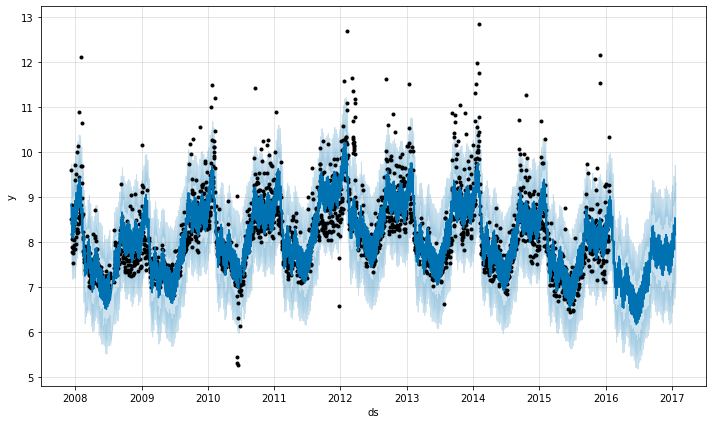

In [7]:
fig=model1.plot(forecast)

In [14]:
list1 = pd.DataFrame([["2017-01-20", 11 ],["2017-01-21",12] ])

list1.columns = ['ds',"dd"]

# 复习一下子rename怎么用
# list1.rename(columns = {"ds":"dsdd"} )

list1

,ds,dd
0,2017-01-20,11
1,2017-01-21,12


In [19]:
pd.DataFrame({"ds":["2017-01-20", "2017-01-21"]})

,ds
0,2017-01-20
1,2017-01-21


In [17]:
list1 = pd.DataFrame(["2017-01-20", "2017-01-21"])
list1.columns =["ds"]
                      
model1.predict(list1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-20,7.190548,7.028994,9.401555,6.457132,7.854539,0.999142,0.999142,0.999142,-0.069568,-0.069568,-0.069568,1.068711,1.068711,1.068711,0.0,0.0,0.0,8.189690
1,2017-01-21,7.189532,6.785075,9.027218,6.453257,7.855077,0.771893,0.771893,0.771893,-0.311715,-0.311715,-0.311715,1.083607,1.083607,1.083607,0.0,0.0,0.0,7.961425


In [65]:
#后面多33天
model1.make_future_dataframe(periods=33)

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
2933,2016-02-18
2934,2016-02-19
2935,2016-02-20
2936,2016-02-21
